In [ ]:
### Telco Customer Churn <br> Sci Learn - Decision Tree

In [1]:
%matplotlib inline

import os
import sys
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

# Decision Tree Classifier from - Sci Learn 
from sklearn.tree import DecisionTreeClassifier

# Split data for testing
from sklearn.model_selection import train_test_split

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))

# from models import evaluation
from models import evaluation

ALGORITHM_NAME = 'dt'
COUNTRY = 'mwi'

Using TensorFlow backend.


In [2]:
# Change the default directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/processed')

In [3]:
# Upload Customer Churn data to dataframe
customer_data = pd.read_csv('Telco-Customer-Churn-Processed.csv')

In [4]:
# Drop Unnamed: 0 - This column is not needed
customer_data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Divide the variables from the target column
target_col = ['Churn']

# Remove the target column
categorical_cols = customer_data.columns
categorical_cols = [col for col in categorical_cols if col not in target_col]

In [6]:
# Variables to a dataframe for processing
x= customer_data[categorical_cols]

In [7]:
y = customer_data.Churn

In [8]:
customer_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [9]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
def get_vif(X):
    vi_factors = [variance_inflation_factor(X.values, i)
                             for i in range(X.shape[1])]
    
    return pd.Series(vi_factors,
                     index=X.columns,
                     name='variance_inflaction_factor')

In [11]:
def standardize(df, numeric_only=True):
    if numeric_only is True:
    # find non-boolean columns
        cols = df.loc[:,df.dtypes != 'uint8'].columns
    else:
        cols = df.columns
    for field in cols:
        mean, std = df[field].mean(), df[field].std()
        # account for constant columns
        if np.all(df[field]-mean != 0):
            df.loc[:,field] = (df[field]-mean)/std
    
    return df

In [12]:
# Fit the model
model = DecisionTreeClassifier()
%time model.fit(x_train, y_train)

CPU times: user 15.1 ms, sys: 3.4 ms, total: 18.5 ms
Wall time: 40.5 ms


DecisionTreeClassifier()

In [13]:
# Get an initial score
%time score = model.score(x_train, y_train)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 3.11 ms, sys: 62 µs, total: 3.17 ms
Wall time: 5.82 ms
In-sample score: 99.80%


In [14]:
# Run the model
y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)[:,1]

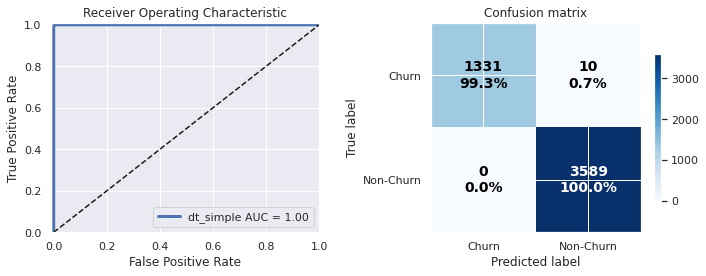

,dt_simple
accuracy,0.997972
recall,0.992543
precision,1.000000
f1,0.996257
cross_entropy,0.002918
roc_auc,0.999990
cohen_kappa,0.994866


In [15]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_train, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_train.columns.values)

In [16]:
# Fit the model
model = DecisionTreeClassifier()
%time model.fit(x_test, y_test)

CPU times: user 10 ms, sys: 483 µs, total: 10.5 ms
Wall time: 20.5 ms


DecisionTreeClassifier()

In [17]:
# Get an initial score
%time score = model.score(x_test, y_test)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 6.92 ms
In-sample score: 99.81%


In [18]:
# Run the model
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

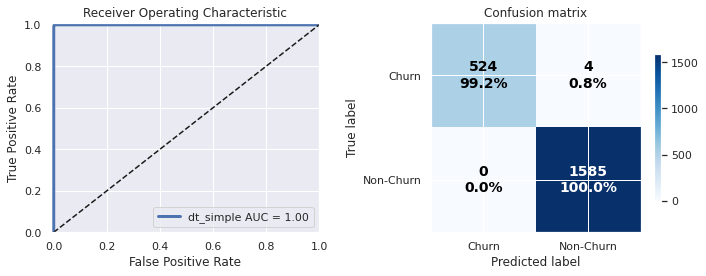

,dt_simple
accuracy,0.998107
recall,0.992424
precision,1.000000
f1,0.996198
cross_entropy,0.002624
roc_auc,0.999990
cohen_kappa,0.994938


In [19]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_test, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_test.columns.values)

In [20]:
# Run the model with complete dataset
y_pred = model.predict(x)
y_prob = model.predict_proba(x)[:,1]

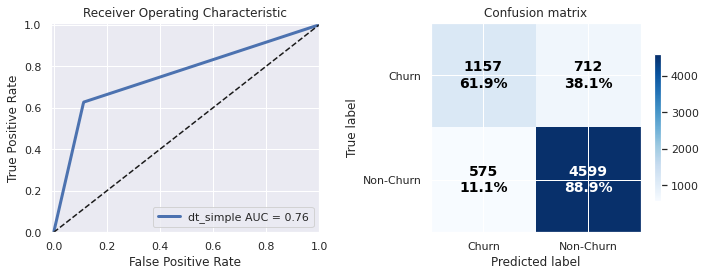

,dt_simple
accuracy,0.817265
recall,0.619048
precision,0.668014
f1,0.642599
cross_entropy,6.235689
roc_auc,0.757357
cohen_kappa,0.520091


In [21]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x.columns.values)

In [22]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_test),
                    feature_names=customer_data.columns, 
                    class_names=['quality'], 
                    # There is no categorical features in this example, otherwise specify them.
                    # categorical_features=,                                
                    verbose=True, mode='regression')

Intercept 0.37650615154282885
Prediction_local [0.15798418]
Right: 0


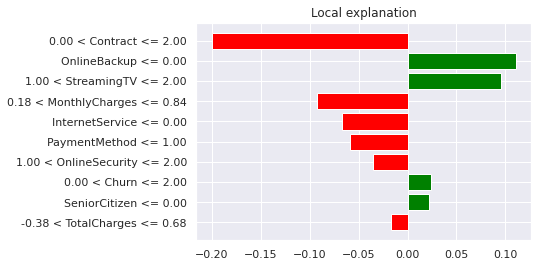

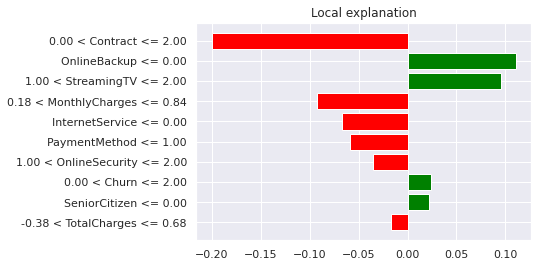

In [24]:
exp = explainer.explain_instance(x_test.iloc[0], model.predict)
exp.as_pyplot_figure()

Intercept 0.08982139025984817
Prediction_local [0.64110379]
Right: 0


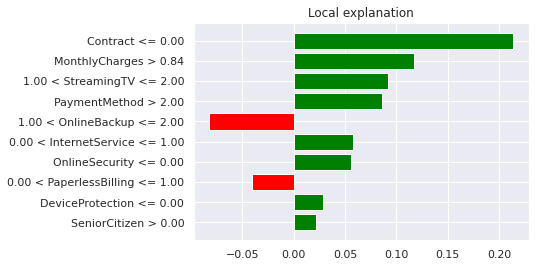

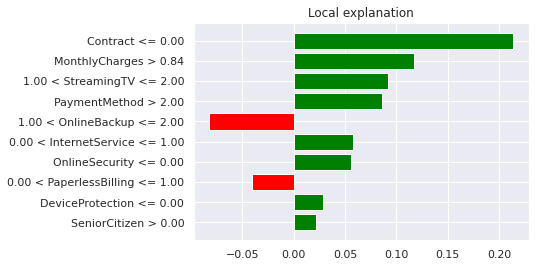

In [25]:
exp = explainer.explain_instance(x_test.iloc[10], model.predict)
exp.as_pyplot_figure()